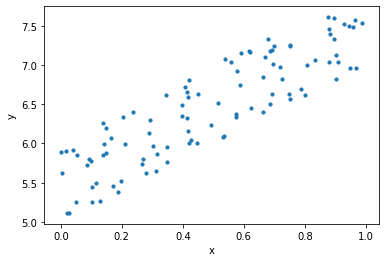

In [10]:
#Generate a random dataset - that will also help us validate our solution from linear regression
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) #so that generation is consistent over the runs
x = np.random.rand(100, 1)
y = 2*x + ( 5 + np.random.rand(100,1) )  # y= 2x + 5.5,  x is in [0,1]

plt.scatter(x,y,s=10);
plt.xlabel('x')
plt.ylabel('y')
plt.show();

### Plotting, when possible, help us understand the data better. And so does descriptive statistics. Skipping that here, because we know how the data is created

In [2]:
#Linear Regression
class LinearRegression:
    
    def __init__( self, learning_rate = 0.01, acceptablePrecisionOfSteps = 1e-6, totalMaxIterations = 1e5 ):
        self.learning_rate = learning_rate
        self.precision = acceptablePrecisionOfSteps
        self.totalMaxIterations = totalMaxIterations
    
    def cost( self, x, y ):
        yPredict = self.predict(x);
        return (1/x.shape[0])*np.sum((yPredict-y)**2)
    
    def fit( self, x, y ):
        #predicts optimal parameters
        self.theta = np.zeros( shape=(x.shape[1],1) ) #initialized to zero
        iterCounter = 0
        stepSize = 1.0
        costValues = [ self.cost(x,y) ]
        while ( (stepSize > self.precision) and iterCounter < self.totalMaxIterations ):
            thetaNew = self.theta - (self.learning_rate/x.shape[0])*np.dot(x.T,
                                                                   ( np.dot(x, self.theta) - y ))
            stepSize = np.sqrt( np.sum( (thetaNew- self.theta)**2 ) );
            self.theta = thetaNew
            iterCounter+= 1
            costValues.append( self.cost(x,y) )
        print('Parameters after {} iterations with learning_rate {} are {}'.format(iterCounter, 
                                                                                   self.learning_rate, self.theta))
        return costValues;

    def predict( self, x ):
        return np.dot(x, self.theta)
        

In [3]:
xTrain = np.c_[ np.ones((x.shape[0],1)), x]
lr = LinearRegression();
lr.fit(xTrain,y);

Parameters after 9123 iterations with learning_rate 0.01 are [[5.49714825]
 [1.97457091]]


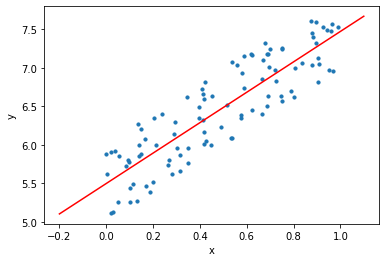

In [4]:
xTest = np.arange(-0.2,1.2,0.1)
yPred = lr.predict( [[1,x] for x in xTest] )

plt.scatter(x,y,s=10);
plt.plot( xTest, yPred, color='r' );
plt.xlabel('x')
plt.ylabel('y')
plt.show();

### With small learning_rate, we will always converge eventually - but can be too slow. So we can try tweaking our learning rate to some higher value

In [5]:
lr = LinearRegression( learning_rate = 0.1 )
lr.fit(xTrain,y);

lr = LinearRegression( learning_rate = 0.001 )
lr.fit(xTrain,y);

Parameters after 1243 iterations with learning_rate 0.1 are [[5.49775087]
 [1.97341639]]
Parameters after 57945 iterations with learning_rate 0.001 are [[5.49112488]
 [1.98611068]]


### Note that because of our condition to stop iterating once our last change in theta is less than a limit ( 1e-6 here ), we may end up very close to minima, but end values can be different.<br>However, with big enough learning rate, we may not converge as we may end up oscillating around minimum point. It is  useful to have maximum cap on total number of iterations for which we run gradient descent

In [6]:
lr = LinearRegression( learning_rate = 1.6 )
lr.fit(xTrain,y);

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()


Parameters after 100000 iterations with learning_rate 1.6 are [[-8.82429385e+250]
 [-4.60597801e+250]]


### Let's plot how cost function changes, as we iterate. Given our cost function is a convex function, we are guaranteed to find the global minima

Parameters after 9123 iterations with learning_rate 0.01 are [[5.49714825]
 [1.97457091]]


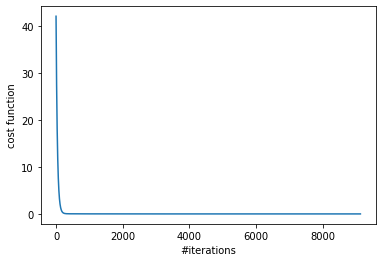

In [7]:
lr = LinearRegression()
costFunctions = lr.fit(xTrain,y)

plt.plot(range(len(costFunctions)),costFunctions)
plt.xlabel('#iterations')
plt.ylabel('cost function')
plt.show()

### Now how do we evaluate the performance of our model ? Let's look at two statistics : RMSE and R^2

In [8]:
yPredicted = lr.predict(xTrain)
RMSE = np.sqrt( (1/xTrain.shape[0])*np.sum( (yPredicted-y)**2 ) )  #here, square root of our cost function
Rsquared = 1 - np.sum( (yPredicted - np.mean(y))**2 )/np.sum( (y - np.mean(y))**2 )# also known as coefficient of determination
print('RMSE for our model is %.3f' % RMSE )
print('Coefficient of determination ( R^2 ) is %.3f' % Rsquared )

RMSE for our model is 0.316
Coefficient of determination ( R^2 ) is 0.227


### Using normal equation to find optimal parameters  - Note that it is pretty close to what we found using our gradient descent implementation. We use following equation : theta =   $(X^{T}$$X)^{-1}$$X^{T}$$Y$
#### Note that it is possible that $X^{T}$$X$ may be non-invertible, in which case we can use pseudo-inverse 

In [9]:
thetaOptimal = np.dot( np.linalg.inv( np.dot(xTrain.T, xTrain) ), np.dot( xTrain.T, y ) )
print('Optimal parmeters found using normal equation are {}'.format(thetaOptimal))

Optimal parmeters found using normal equation are [[5.49781698]
 [1.97328974]]
